In [2]:
import pandas as pd
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set()


import warnings
warnings.filterwarnings('ignore')

# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  
#import helpers

In [3]:
# Training file directory
DATASET = os.path.join(ROOT_DIR, 'dataset')
OUTPUTS = os.path.join(ROOT_DIR, 'outputs', 'auc')
DATASET, OUTPUTS

('/home/hasib/lesion-learnt/dataset', '/home/hasib/lesion-learnt/outputs/auc')

In [4]:
import pickle

def save_obj(obj, name):
    with open('{}/'.format(OUTPUTS) + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('{}/'.format(OUTPUTS) + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def get_unique(arr):
  '''
  Return unique elements in list
  '''
  arr = set(arr)
  return arr

#raw_features = load_obj('raw_features')
#target = load_obj('target')

In [5]:
exp1 = load_obj('1')
exp2 = load_obj('2')
exp3 = load_obj('3')
exp4 = load_obj('4')
exp1

{'fpr': array([0.        , 0.        , 0.        , 0.01333333, 0.01333333,
        0.02666667, 0.02666667, 0.04      , 0.04      , 0.05333333,
        0.05333333, 0.06666667, 0.06666667, 0.08      , 0.08      ,
        0.09333333, 0.09333333, 0.10666667, 0.10666667, 0.12      ,
        0.12      , 0.13333333, 0.13333333, 0.14666667, 0.14666667,
        0.16      , 0.16      , 0.17333333, 0.17333333, 0.18666667,
        0.18666667, 0.2       , 0.2       , 0.21333333, 0.21333333,
        0.22666667, 0.22666667, 0.24      , 0.24      , 0.25333333,
        0.25333333, 0.26666667, 0.26666667, 0.28      , 0.28      ,
        0.29333333, 0.29333333, 0.30666667, 0.30666667, 0.32      ,
        0.32      , 0.33333333, 0.33333333, 0.34666667, 0.34666667,
        0.36      , 0.36      , 0.37333333, 0.37333333, 0.38666667,
        0.38666667, 0.4       , 0.4       , 0.41333333, 0.41333333,
        0.42666667, 0.42666667, 0.46666667, 0.46666667, 0.48      ,
        0.48      , 0.49333333, 0.4933333

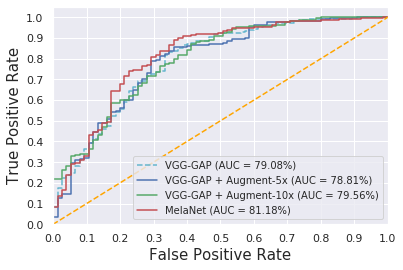

In [6]:
lw = None
plt.figure()
labels = ['VGG-GAP', 'VGG-GAP + Augment-5x', 'VGG-GAP + Augment-10x', 'MelaNet']
plt.plot(exp1["fpr"], exp1["tpr"], color='c', lw=lw, linestyle = "--", label='VGG-GAP (AUC = {0:.2f}%)'.format(exp1["roc_auc"] * 100))
plt.plot(exp2["fpr"], exp2["tpr"], color='b', lw=lw, label='VGG-GAP + Augment-5x (AUC = {0:.2f}%)'.format(exp2["roc_auc"] * 100))
plt.plot(exp3["fpr"], exp3["tpr"], color='g', lw=lw, label='VGG-GAP + Augment-10x (AUC = {0:.2f}%)'.format(exp3["roc_auc"] * 100))
plt.plot(exp4["fpr"], exp4["tpr"], color='r', lw=lw,label='MelaNet (AUC = {0:.2f}%)'.format(exp4["roc_auc"] * 100))

#plt.plot([0, 1], [0, 1], color='darkorange', lw=lw)
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(prop={'size':10}, loc="lower right")
plt.savefig("{}/auc_2020.pdf".format(OUTPUTS), dpi=1000)
plt.show()

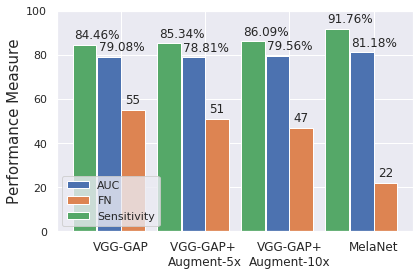

In [31]:
labels = ['VGG-GAP', 'VGG-GAP+ \nAugment-5x', 'VGG-GAP+\nAugment-10x', 'MelaNet']

auc = [79.08, 78.81, 79.56, 81.18]
postive_misslcass = [55, 51, 47, 22]
sensitivity = [84.46, 85.34, 86.09, 91.76]

x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.28  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, auc, width, label='AUC')
rects2 = ax.bar(x + width/2, postive_misslcass, width, label='FN')
rects3 = ax.bar(x - width/2 * 3.08, sensitivity, width, label='Sensitivity')

ax.set_ylabel('Performance Measure', fontsize=15)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=12)
ax.legend(loc='lower left')
ax.set_ylim([0,100])
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=( 0.15 + rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



autolabel_(rects1) # %
autolabel(rects2)
autolabel_(rects3) # %

fig.tight_layout()
plt.savefig("{}/outputs/results.pdf".format(ROOT_DIR), dpi=1200)
plt.show()

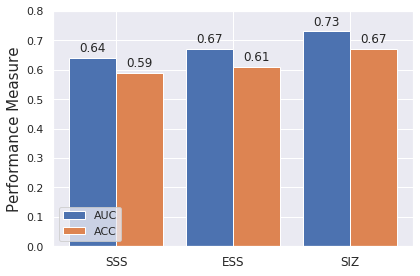

In [5]:
labels = ['SSS', 'ESS', 'SIZ']

auc = [0.64, 0.67, 0.73]
acc = [0.59, 0.61, 0.67]

x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.4  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, auc, width, label='AUC')
rects2 = ax.bar(x + width/2, acc, width, label='ACC')
#rects3 = ax.bar(x - width/2 * 3.08, sensitivity, width, label='Sensitivity')

ax.set_ylabel('Performance Measure', fontsize=15)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=12)
ax.legend(loc='lower left')
ax.set_ylim([0,0.8])
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        ax.set_ylim(ymin=0)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=( 0.15 + rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        ax.set_ylim(ymin=0)



autolabel(rects1) # %
autolabel(rects2)
#autolabel_(rects3) # %

fig.tight_layout()
plt.savefig("results.pdf".format(ROOT_DIR), dpi=1200)
plt.show()